<a href="https://colab.research.google.com/github/Ovocode05/NeuroDeff/blob/main/LTNE_model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from itertools import product
import math
import pathlib
import os
import tensorflow as tf

In [3]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 8.8 MB/s eta 0:00:00


In [4]:
import deepxde as dde

No backend selected.
Finding available backend...


Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Found tensorflow.compat.v1
Setting the default backend to "tensorflow.compat.v1". You can change it in the ~/.deepxde/config.json file or export the DDE_BACKEND environment variable. Valid options are: tensorflow.compat.v1, tensorflow, pytorch, jax, paddle (all lowercase)


Enable just-in-time compilation with XLA.



In [40]:
Output_directory = pathlib.Path.cwd() / "results" / "LTNE_model1"
if not Output_directory.exists():
    os.makedirs(Output_directory, exist_ok=True)

In [50]:
def ode_system(n, y, omega=1.0):
    T_f = y[:, 0:1]
    T_s = y[:, 1:2]

    # Compute first derivatives (jacobian) - only j=0 for 1D problem
    T_f_n = dde.grad.jacobian(T_f, n)
    T_s_n = dde.grad.jacobian(T_s, n)

    # Compute second derivatives (hessian) - only j=0 for 1D problem
    T_f_nn = dde.grad.hessian(T_f, n)
    T_s_nn = dde.grad.hessian(T_s, n)

    # Parameters
    eps = 0.1 #porosity
    k = 25.0 #
    delta = -0.2
    beta = 10

    Bi  = 100* (tf.sin(tf.constant(np.pi, dtype=n.dtype) * omega * n)**2)

    eqn1 = eps * k * (1 + delta * T_f) * T_f_nn + eps * k * delta * (T_f_n ** 2) + Bi * (T_s - T_f) - 1 - beta
    eqn2 = (1 - eps) * (1 + delta * T_s) * T_s_nn + (1 - eps) * delta * (T_s_n ** 2) - Bi * (T_s - T_f) + beta

    return [eqn1, eqn2]

In [47]:
# Define geometry (1D domain from 0 to 1)
geom = dde.geometry.Interval(0, 1)

# Boundary conditions
def boundary_right(x, on_boundary):
    return on_boundary and np.isclose(x[0], 1.0)

def boundary_left(x, on_boundary):
    return on_boundary and np.isclose(x[0], 0.0)

# Dirichlet BC at x=1
bc_Tf_right = dde.DirichletBC(geom, lambda x: 0, boundary_right, component=0)
bc_Ts_right = dde.DirichletBC(geom, lambda x: 0, boundary_right, component=1)

# Neumann BC at x=0
bc_Tf_left = dde.NeumannBC(geom, lambda x: 0, boundary_left, component=0)
bc_Ts_left = dde.NeumannBC(geom, lambda x: 0, boundary_left, component=1)

Training for omega = 1.0
Compiling model...
Building feed-forward neural network...
'build' took 0.062422 s

'compile' took 1.471569 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.44e+02, 1.43e+02, 9.29e-02, 3.93e-02, 1.46e-01, 6.26e-02]    [1.44e+02, 1.43e+02, 9.29e-02, 3.93e-02, 1.46e-01, 6.26e-02]    []  
1000      [1.02e+01, 1.48e+01, 1.96e-01, 2.10e-02, 4.23e-01, 4.82e-01]    [1.02e+01, 1.48e+01, 1.96e-01, 2.10e-02, 4.23e-01, 4.82e-01]    []  
2000      [5.15e-02, 1.90e-01, 3.92e-01, 1.11e-01, 8.71e-02, 2.65e-03]    [5.15e-02, 1.90e-01, 3.92e-01, 1.11e-01, 8.71e-02, 2.65e-03]    []  
3000      [4.67e-02, 1.61e-01, 2.58e-01, 1.61e-01, 1.10e-02, 6.05e-04]    [4.67e-02, 1.61e-01, 2.58e-01, 1.61e-01, 1.10e-02, 6.05e-04]    []  
4000      [4.33e-02, 1.58e-01, 2.21e-01, 1.40e-01, 8.26e-03, 7.38e-04]    [4.33e-02, 1.58e-01, 2.21e-01, 1.40e-01, 8.26e-03

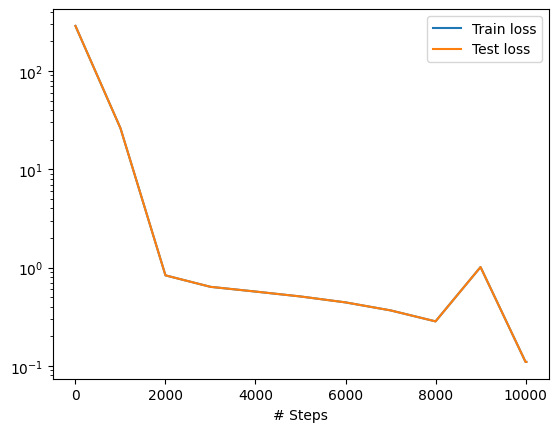

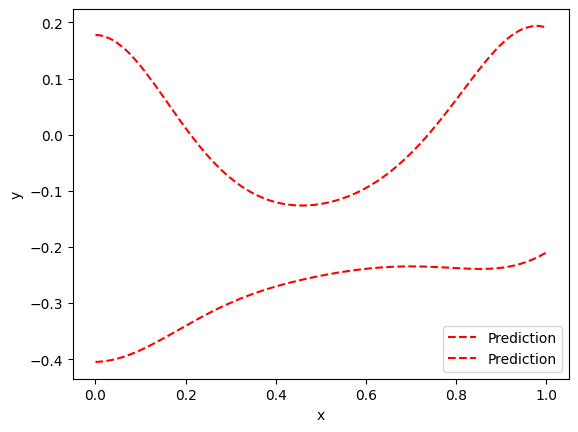

Training for omega = 2.0
Compiling model...
Building feed-forward neural network...
'build' took 0.056360 s

'compile' took 1.552104 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.76e+02, 1.75e+02, 9.29e-02, 3.93e-02, 1.46e-01, 6.26e-02]    [1.76e+02, 1.75e+02, 9.29e-02, 3.93e-02, 1.46e-01, 6.26e-02]    []  
1000      [1.90e+01, 3.18e+01, 3.86e-01, 3.63e-01, 1.31e+00, 9.74e-01]    [1.90e+01, 3.18e+01, 3.86e-01, 3.63e-01, 1.31e+00, 9.74e-01]    []  
2000      [1.56e+01, 2.98e+01, 4.01e-01, 4.85e-01, 1.25e+00, 1.13e+00]    [1.56e+01, 2.98e+01, 4.01e-01, 4.85e-01, 1.25e+00, 1.13e+00]    []  
3000      [1.50e+01, 2.59e+01, 5.22e-01, 8.48e-01, 6.01e-01, 3.42e-01]    [1.50e+01, 2.59e+01, 5.22e-01, 8.48e-01, 6.01e-01, 3.42e-01]    []  
4000      [4.24e+00, 8.72e+00, 8.40e-02, 3.78e-01, 2.50e-01, 9.77e-01]    [4.24e+00, 8.72e+00, 8.40e-02, 3.78e-01, 2.50e-01

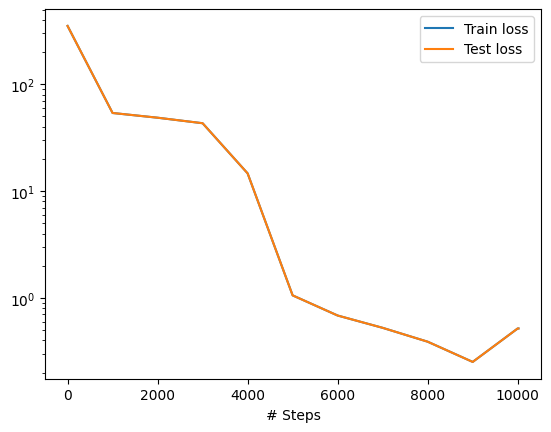

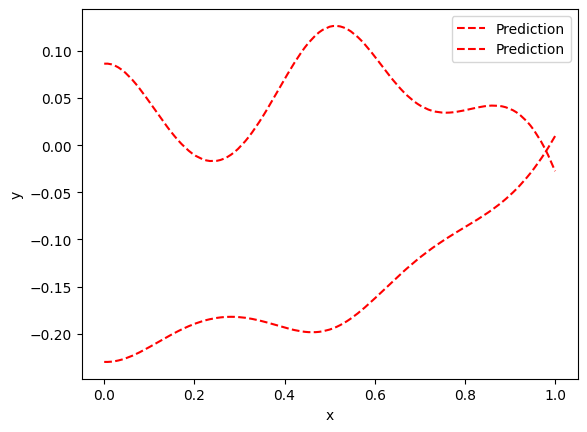

Training for omega = 3.0
Compiling model...
Building feed-forward neural network...
'build' took 0.054138 s

'compile' took 1.574872 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [1.78e+02, 1.78e+02, 9.29e-02, 3.93e-02, 1.46e-01, 6.26e-02]    [1.78e+02, 1.78e+02, 9.29e-02, 3.93e-02, 1.46e-01, 6.26e-02]    []  
1000      [2.32e+01, 3.55e+01, 4.06e-01, 3.05e-01, 1.16e+00, 9.57e-01]    [2.32e+01, 3.55e+01, 4.06e-01, 3.05e-01, 1.16e+00, 9.57e-01]    []  
2000      [1.81e+01, 3.57e+01, 4.36e-01, 4.02e-01, 8.34e-01, 1.41e+00]    [1.81e+01, 3.57e+01, 4.36e-01, 4.02e-01, 8.34e-01, 1.41e+00]    []  
3000      [1.16e+01, 1.98e+01, 4.07e-01, 8.34e-01, 8.81e-01, 1.75e+00]    [1.16e+01, 1.98e+01, 4.07e-01, 8.34e-01, 8.81e-01, 1.75e+00]    []  
4000      [1.13e+01, 1.81e+01, 3.77e-01, 8.95e-01, 6.60e-01, 1.89e+00]    [1.13e+01, 1.81e+01, 3.77e-01, 8.95e-01, 6.60e-01

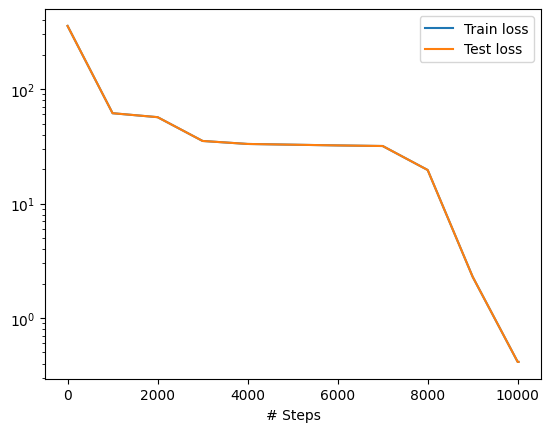

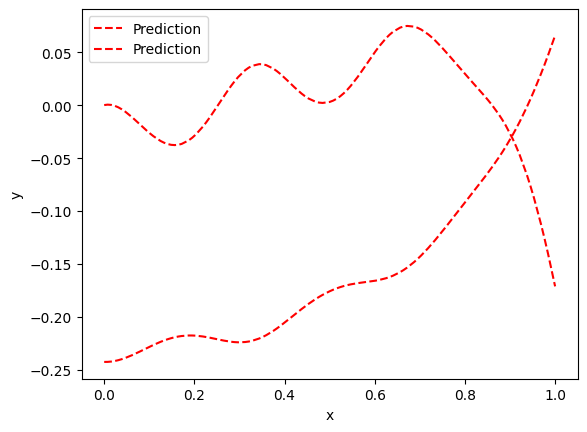

In [52]:
omega_values = [1.0, 2.0, 3.0]
results = {}

for omega in omega_values:
  print(f"Training for omega = {omega}")

  def ode_wrapped(n , y):
    return ode_system(n, y, omega)

  # Define PDE problem
  data = dde.data.PDE(
      geom,
      ode_wrapped,
      [bc_Tf_right, bc_Ts_right, bc_Tf_left, bc_Ts_left],
      num_domain=100,
      num_boundary=20,
  )
  # print("The training set is {}".format(data.train_x_all.T))

  nn = dde.maps.FNN([1] + [50]*3 + [2], "tanh", "Glorot normal")
  model = dde.Model(data, nn)

  # Compile and train
  model.compile("adam", lr=0.001)
  losshistory, train_state = model.train(iterations=10000, display_every=1000)

  # Refine training with L-BFGS
  model.compile("L-BFGS-B", lr=0.001)
  losshistory, train_state = model.train(iterations=10000, display_every=1000)

  # Save and plot results
  dde.saveplot(losshistory, train_state, issave=True, isplot=True)
  n = np.linspace(0, 1, 50).reshape(-1, 1)
  T_pred = model.predict(n)

  if isinstance(T_pred, list) and isinstance(T_pred[0], np.ndarray):
      T_pred = np.hstack(T_pred)

  T_f_pred = T_pred[:, 0:1]
  T_s_pred = T_pred[:, 1:2]

  results[omega] = (n.flatten(), T_f_pred, T_s_pred)

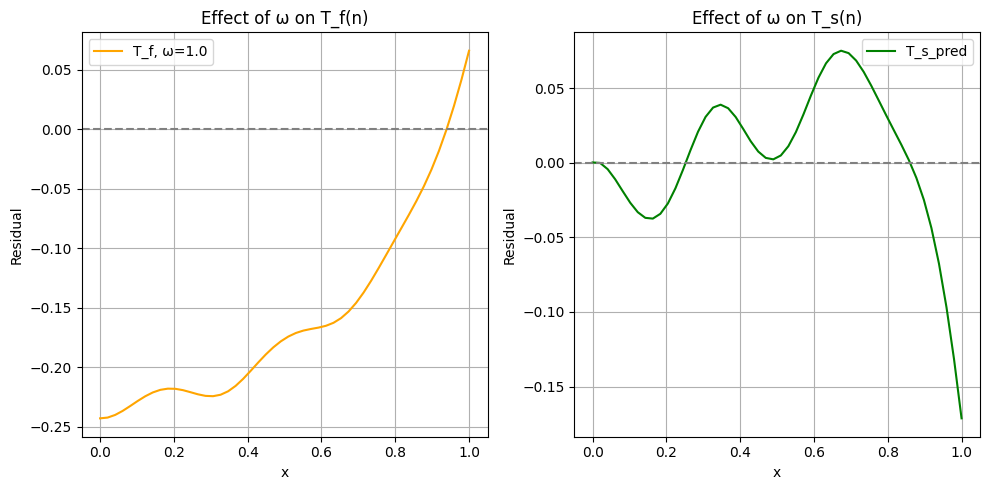

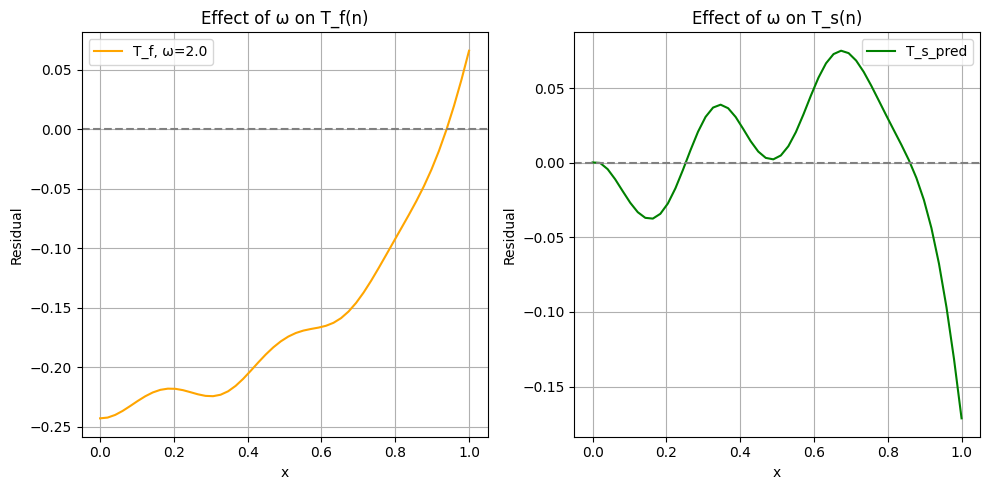

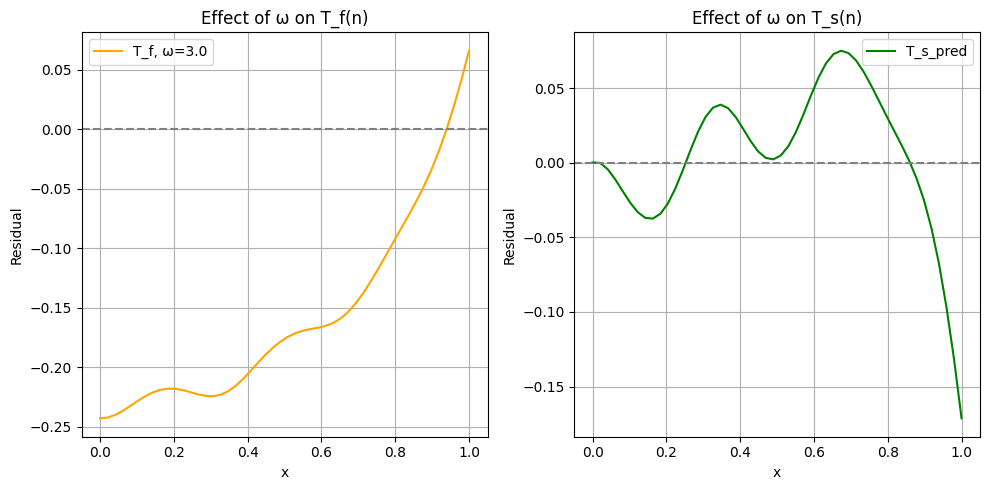

In [53]:
for omega, (n, T_f, T_s) in results.items():
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.plot(n, T_f_pred, label=f"T_f, ω={omega}",color="orange")
  plt.axhline(0, color="gray", linestyle="--")
  plt.xlabel("x")
  plt.ylabel("Residual")
  plt.title("Effect of ω on T_f(n)")
  plt.grid(True)
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(n, T_s_pred, label="T_s_pred", color="green")
  plt.axhline(0, color="gray", linestyle="--")
  plt.xlabel("x")
  plt.ylabel("Residual")
  plt.title("Effect of ω on T_s(n)")
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()
